# **Analiza ekonomskega stanja slovenskih občin in regij**
#### *Projektna naloga iz analize podatkov pri predmetu Programiranje 1*

> V svoji analizi podatkov predstavljam določene aspekte ekonomskega stanja v 210 slovenskih občinah glede na zbirko podatkov [statističnega urada Republike Slovenije](https://www.stat.si/obcine) za leto 2019. V Sloveniji od leta 2011 obstaja 212 občin - zadnji dve novonastali, Anakaran in Mirna, sta iz te analize izvzeti.
>
> #### **Zajem podatkov**
> Za vsako občino sem zajel naslednje podatke:
> * ime občine
> * regija in upravna enota
> * površina, število prebivalcev in skupni prirast prebivalstva
> * stopnja delovno aktivnega prebivalstva
> * neto plača na prebivalca
> * letni prihodek podjetij
> * povprečna starost avtomobilov na dan 31. december za to leto
>
> #### **Delovne hipoteze**
> Pred začetkom sem si postavil nekaj hipotez na katera bom poskusil odgovoriti poleg drugih zanimivih opažanj, ki jih utegnem najti ob analizi:
> * Obstaja korelacija med povprečno neto plačo in delovno aktivnostjo.
> * Najnižji neto mesečni dohodki so prisotni v pomurski regiji ter jugovzhodni Sloveniji.
> * Regije so precej centralizirane na svoje mestne občine z vidika neto plače in prilivov podjetij.
> * Starost avtomobilov je skladna s povprečnim dohodkom prebivalca posamezne regije.


### **Delovno okolje**

Analiza in manipulacija podatkov bo izvedena z uporabo knjižnice Pandas, zato je potrebno le-to najprej uvoziti. Za upravljanje in reprezentacijo rezultatov pa bomo uporabljali še nekatera priročna orodja.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor

Naložimo celotno razpredelnico podatkov, s katerimi bomo razpolagali.

In [2]:
obcine = pd.read_csv('obcine.csv', index_col='id')
obcine

,ime_obcine,regija,UE,povrsina,prebivalci,prirast,delovna_aktivnost,placa,podjetja,starost_avtomobila
id,,,,,,,,,,
1,Ajdovščina,goriška,Ajdovščina,245,19364,8.9,69.1,1055.98,703624000,11.8
2,Apače,pomurska,Gornja Radgona,54,3532,5.1,45.0,978.90,27489000,9.7
3,Beltinci,pomurska,Murska Sobota,62,8098,-5.6,59.0,953.26,103717000,9.9
4,Benedikt,podravska,Lenart,24,2584,14.7,59.0,966.69,27658000,10.3
5,Bistrica ob Sotli,posavska,Šmarje pri Jelšah,31,1333,6.8,63.7,1042.67,10954000,11.5
...,...,...,...,...,...,...,...,...,...,...
206,Železniki,gorenjska,Škofja Loka,164,6699,4.6,71.7,1084.10,289400000,10.4
207,Žetale,podravska,Ptuj,38,1297,12.3,65.6,1029.91,5695000,10.5
208,Žiri,gorenjska,Škofja Loka,49,4915,11.0,74.3,1023.21,276784000,11.3


### **Proučevanje in interpretacija podatkov**

#### **Osnovni podatki**

Poglejmo si porazdelitev prebivalstva Slovenije najprej celovkupno, nato pa se porazdelitev po regijah in upravnih enotah.

In [3]:
obcine[['ime_obcine', 'regija', 'UE', 'povrsina', 'prebivalci']]

,ime_obcine,regija,UE,povrsina,prebivalci
id,,,,,
1,Ajdovščina,goriška,Ajdovščina,245,19364
2,Apače,pomurska,Gornja Radgona,54,3532
3,Beltinci,pomurska,Murska Sobota,62,8098
4,Benedikt,podravska,Lenart,24,2584
5,Bistrica ob Sotli,posavska,Šmarje pri Jelšah,31,1333
...,...,...,...,...,...
206,Železniki,gorenjska,Škofja Loka,164,6699
207,Žetale,podravska,Ptuj,38,1297
208,Žiri,gorenjska,Škofja Loka,49,4915


,povrsina,prebivalci,prirast,delovna_aktivnost,placa,podjetja,starost_avtomobila,podjetje_na_zaposlenega
count,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000
mean,96.385714,9921.300000,4.475714,64.822857,1020.556667,5.770889e+08,10.422857,46996.463381
std,88.133103,22757.313237,10.543146,6.531034,89.897899,3.211678e+09,0.708899,47751.830884
min,7.000000,358.000000,-43.700000,34.400000,714.130000,2.380000e+05,8.100000,1846.680000
25%,36.250000,2914.000000,-0.775000,61.625000,967.670000,3.854725e+07,9.900000,21041.660000
50%,65.000000,4824.500000,4.950000,66.650000,1013.625000,1.093080e+08,10.400000,32109.390000
75%,117.750000,10417.500000,10.675000,69.475000,1064.245000,3.805072e+08,10.800000,55925.072500
max,555.000000,294113.000000,34.500000,76.300000,1433.900000,4.550430e+10,12.700000,382538.370000


In [4]:
regije = obcine.groupby('regija').sum()[['prebivalci']].sort_values('prebivalci', ascending=False)
regije

,prebivalci
regija,
osrednjeslovenska,552221
podravska,324875
savinjska,257425
gorenjska,205717
jugovzhodna Slovenija,142066
goriška,118008
pomurska,114396
obalno-kraška,112398
posavska,75807


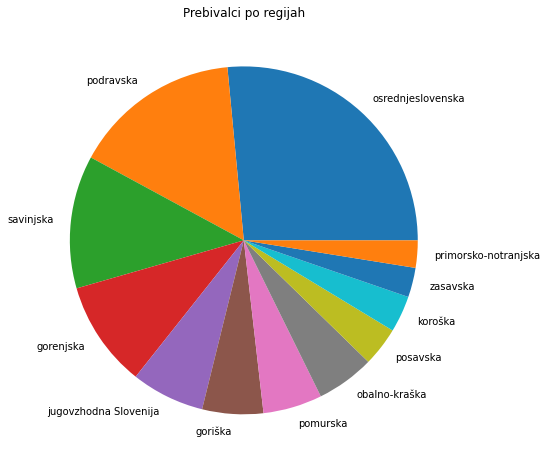

In [5]:
prebivalci = regije.prebivalci.plot.pie(figsize=(10, 8), title='Prebivalci po regijah')
prebivalci.axes.get_yaxis().set_visible(False)

In [6]:
top_obcine = obcine.nlargest(25, ['prebivalci'])
top_obcine[['ime_obcine', 'regija', 'povrsina', 'prebivalci']]

,ime_obcine,regija,povrsina,prebivalci
id,,,,
82,Ljubljana,osrednjeslovenska,275,294113
94,Maribor,podravska,148,112095
72,Kranj,gorenjska,151,56715
68,Koper,obalno-kraška,303,52540
16,Celje,savinjska,95,49602
113,Novo mesto,jugovzhodna Slovenija,236,37280
34,Domžale,osrednjeslovenska,72,36429
190,Velenje,savinjska,84,33506
112,Nova Gorica,goriška,280,31932


In [7]:
top_obcine['prebivalci'].sum() 

1049615

Kot lahko vidimo, je veliko prebivalstva skoncentriranega na območju tako imenovanih mestnih občin (Ljubljana, Maribor, Kranj, Koper, Celje, Novo mesto, Velenje, Nova Gorica, Krško, Ptuj, MUrska Sobota, Slovenj Gradec) in njihovih bližnjih gravitacijskih občin. Tovrsten naziv po Zakonu o lokalni samoupravi dobijo občine, ki imajo najmanj 15 tisoč delovnih mest, od tega s precejšnjo večino v terciarnem in kvartarnem sektorju dejavnosti, poleg tega pa so tudi pomembna središča širšega območja.

Izračunajmo še število občin, ki pripadajo posamezni statistični regiji.

In [8]:
regijsko = obcine[['ime_obcine', 'regija']]
regije_prestete = regijsko.pivot_table(columns=['regija'], aggfunc='size')
regije_prestete


regija
gorenjska                18
goriška                  13
jugovzhodna Slovenija    20
koroška                  12
obalno-kraška             7
osrednjeslovenska        25
podravska                41
pomurska                 27
posavska                  6
primorsko-notranjska      6
savinjska                31
zasavska                  4
dtype: int64

#### **Delovna aktivnost**

S primernim grafom lahko poskušamo ugotoviti, ali obstaja korelacija med delovno aktivnostjo in plačo v danih občinah v državi.

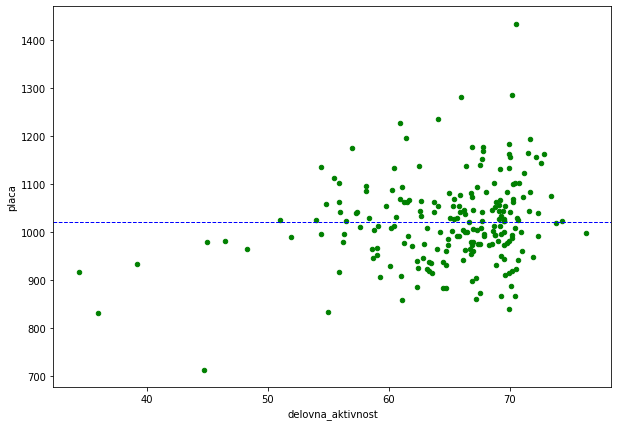

In [9]:
graf = obcine[['delovna_aktivnost', 'placa']].plot.scatter('delovna_aktivnost', 'placa', figsize=(10,7), color='green')
graf.axhline(y=obcine.placa.mean(), color='blue', linestyle='--', lw=1)

In [10]:
obcine['placa'].corr(obcine['delovna_aktivnost'])

0.2272548765280123

Vidimo lahko, da v večini delovna aktivnost ne bistveno vpliva na višino povprečne neto plače na prebivalca v posamezni občini, oziroma vsaj ni jasne korelacije. Pri delovno aktivnejših so sicer odkloni rahlo višji navzgor, ampak imajo tudi primerljive občine nižji neto dohodek na prebivalca.


Podrobneje si poglejmo skrajne primere delovno aktivnih občin.

In [11]:
obcine.nlargest(7, 'delovna_aktivnost')[['ime_obcine', 'povrsina', 'prebivalci', 'regija', 'prirast', 'delovna_aktivnost', 'placa']]

,ime_obcine,povrsina,prebivalci,regija,prirast,delovna_aktivnost,placa
id,,,,,,,
7,Bloke,75,1567,primorsko-notranjska,6.4,76.3,997.50
208,Žiri,49,4915,gorenjska,11.0,74.3,1023.21
176,Šmarješke Toplice,34,3400,jugovzhodna Slovenija,25.0,73.8,1018.17
55,Ivančna Gorica,227,16880,osrednjeslovenska,12.9,73.4,1075.69
52,Idrija,294,11797,goriška,5.3,72.8,1162.22
49,Horjul,33,3032,osrednjeslovenska,3.3,72.6,1143.16
185,Trebnje,163,13018,jugovzhodna Slovenija,17.8,72.3,1040.98


In [12]:
obcine.nsmallest(7, 'delovna_aktivnost')[['ime_obcine', 'povrsina', 'prebivalci', 'regija', 'prirast', 'delovna_aktivnost', 'placa']]

,ime_obcine,povrsina,prebivalci,regija,prirast,delovna_aktivnost,placa
id,,,,,,,
77,Kuzma,23,1574,pomurska,0.0,34.4,917.21
48,Hodoš,18,358,pomurska,-2.8,36.0,832.76
144,Rogašovci,40,3070,pomurska,-11.7,39.2,934.13
117,Osilnica,36,366,jugovzhodna Slovenija,-43.7,44.7,714.13
2,Apače,54,3532,pomurska,5.1,45.0,978.90
44,Grad,37,2063,pomurska,-17.0,46.5,981.47
15,Cankova,31,1724,pomurska,-0.6,48.3,965.71


Zanimivo je delovno najbolj aktivna občina na plačnem nivoju pod povprečjem.

Za občine pri repu lahko trdimo, da so to občine z nižje plačanimi prebivalci. Kot vidimo gre za majhne občine iz pomurske regije, opazimo pa tudi dejstvo, da je na območju teh občin prirast pretežno negativen, zaradi česar ni napačno trditi, da je stopnja odseljevanja tukaj precej velika. Tovrstna dejstva tudi suvereno implicirajo starostno porazdelitev in starostno piramido v obliki žare.

#### **Osebni dohodki**

Izračunajmo povprečne plače po posameznih regijah.

In [13]:
sum_place = obcine.groupby('regija').sum()[['placa']].sort_values('regija', ascending=False)
avg_place = (sum_place.placa / regije_prestete).round(decimals=2)
avg_place.sort_values(ascending=False)

regija
gorenjska                1082.77
goriška                  1051.98
koroška                  1049.84
osrednjeslovenska        1048.03
zasavska                 1033.46
obalno-kraška            1032.95
posavska                 1018.29
jugovzhodna Slovenija    1016.44
savinjska                1002.17
primorsko-notranjska     1000.42
podravska                 992.86
pomurska                  991.58
dtype: float64

<AxesSubplot:title={'center':'Povprečna neto plača v regiji'}, xlabel='regija'>

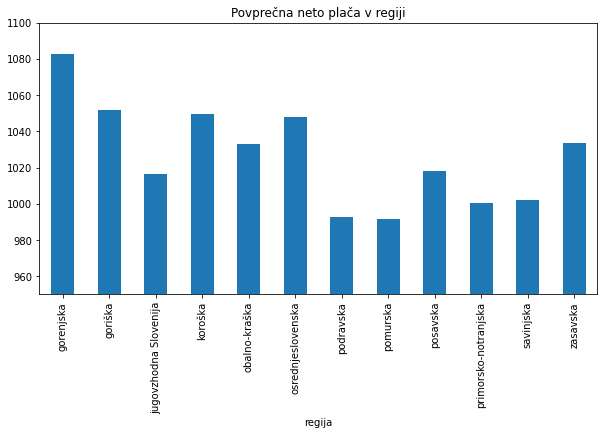

In [14]:
avg_place.plot.bar(ylim=(950, 1100), figsize=(10,5), title='Povprečna neto plača v regiji')

Nato izberimo v vsaki regiji občino z najvišjim povprečnim neto dohodkom in naredimo primerjavo.

In [15]:
obcine.set_index(['ime_obcine']).groupby('regija')['placa'].nlargest(1).reset_index().sort_values(['placa'], ascending=False)

,regija,ime_obcine,placa
0,gorenjska,Cerklje na Gorenjskem,1433.90
2,jugovzhodna Slovenija,Novo mesto,1286.19
5,osrednjeslovenska,Ljubljana,1281.66
6,podravska,Podlehnik,1236.24
3,koroška,Mežica,1195.89
10,savinjska,Štore,1177.18
4,obalno-kraška,Koper,1176.38
8,posavska,Krško,1169.26
1,goriška,Idrija,1162.22
7,pomurska,Križevci,1133.95


Zgornja tabela nam lahko pove kaj o homogenosti celotne regije oziroma o nekakšni (poli)centričnosti znotraj regije. Vidimo lahko, da v približno polovici primerov plačno najmočnejše občine ne ustrezajo občinam z "de facto" glavnim mestom regije.

Kot obakratna vodilna se tukaj pokaže gorenjska regija, ki ima in najboljše regijsko povprečje in najboljše občinsko povprečje, je pa tudi precej policentrično strukturirana. 

Morda presenečajo nekatera večja odstopanja pri primerjavi obeh tabel oziroma njuni razvrstitvi.
Goriška na primer kot regija kotira precej visoko v tem vidiku, vendar njena dohodkovno najmočnejša občina stoji precej nizko. Nasprotno lahko vidimo v primeru podravske regije.

V grobem raziščimo morebitno korelacijo med višino plače in naravnim prirastom lokalnega prebivalstva.

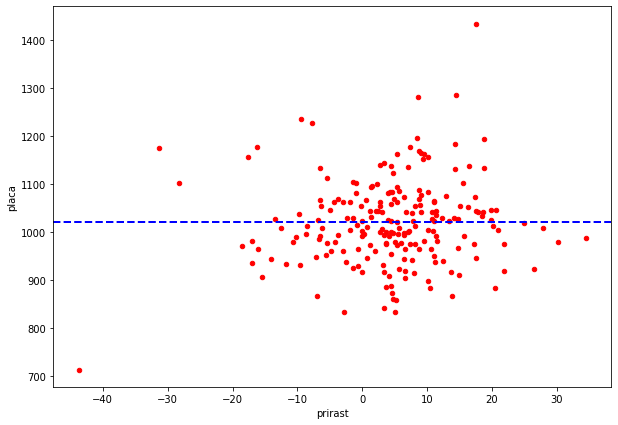

In [16]:
prirast = obcine[['prirast', 'placa']].plot.scatter('prirast', 'placa', figsize=(10,7), color='red')
prirast.axhline(y=obcine.placa.mean(), color='blue', linestyle='--', lw=2)

In [17]:
obcine['placa'].corr(obcine['prirast'])

0.09492769933546429

Posebnih korelacij ne opazimo.

#### **Zaslužki podjetij**

Poglejmo si tudi stanje s prihodki podjetij v občinah in regijah. Pri tem je morda smiselno za primerjavo uporabiti neto dohodek podjetja na delovno aktivnega prebivalca v posamezni občini in celovkupen neto dohodek podjetja na posameznega prebivalca v regiji. 

In [18]:
obcine['podjetje_na_zaposlenega'] = round(obcine.podjetja / ((obcine.delovna_aktivnost / 100) * obcine.prebivalci), 2)
podjetni = obcine[['ime_obcine', 'regija', 'prebivalci', 'delovna_aktivnost', 'placa', 'podjetje_na_zaposlenega']].sort_values('podjetje_na_zaposlenega', ascending=False)
podjetni

,ime_obcine,regija,prebivalci,delovna_aktivnost,placa,podjetje_na_zaposlenega
id,,,,,,
187,Trzin,osrednjeslovenska,3923,71.2,1123.40,382538.37
82,Ljubljana,osrednjeslovenska,294113,66.0,1281.66,234419.79
111,Nazarje,savinjska,2608,66.9,1072.53,233853.29
114,Odranci,pomurska,1644,67.0,961.71,213546.32
67,Komenda,osrednjeslovenska,6345,71.7,1193.57,202342.96
...,...,...,...,...,...,...
181,Tabor,savinjska,1659,70.4,866.34,6925.04
207,Žetale,podravska,1297,65.6,1029.91,6693.45
165,Šalovci,pomurska,1383,54.4,996.00,5203.68


<AxesSubplot:title={'center':'Razporeditev občin po neto dobičku podjetij na prebivalca'}, ylabel='Frequency'>

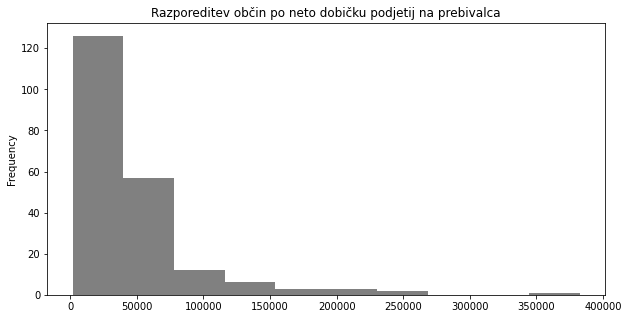

In [19]:
podjetni['podjetje_na_zaposlenega'].plot.hist(color='gray', figsize=(10,5), title='Razporeditev občin po neto dobičku podjetij na prebivalca')

In [20]:
(podjetni['podjetje_na_zaposlenega'] > 5*12*obcine.placa.mean()).value_counts()

False    167
True      43
Name: podjetje_na_zaposlenega, dtype: int64

In [21]:
(podjetni['podjetje_na_zaposlenega'] > 12*obcine.placa.mean()).value_counts()

True     191
False     19
Name: podjetje_na_zaposlenega, dtype: int64

V državi je 43 takšnih občin, katerih celoletni dobiček podjetij presega petkratnik celoletnega dohodka povprečnega Slovenca. V 19 občinah se to ne zgodi niti z enkratnikom.

In [22]:
nezadostni = podjetni['podjetje_na_zaposlenega'] <= 12*(obcine.placa.mean())
obcine[nezadostni].groupby('regija').size()

<ipython-input-22-2bfef6491f76>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obcine[nezadostni].groupby('regija').size()


regija
jugovzhodna Slovenija    1
koroška                  1
podravska                8
pomurska                 8
savinjska                1
dtype: int64

Največ tovrstnih je v podravski in pomurski regiji, kjer gre predvsem za majhne občine, tako po številu prebivalcev, kot po velikosti ozemlja. Na določeni točki bi bilo ob takšnih rezultatih moč govoriti tudi o smiselnosti obstoju dotičnih občin kot samostojne samouprave.

<AxesSubplot:title={'center':'Povprečni neto prihodek podjetij na osebo'}, xlabel='regija'>

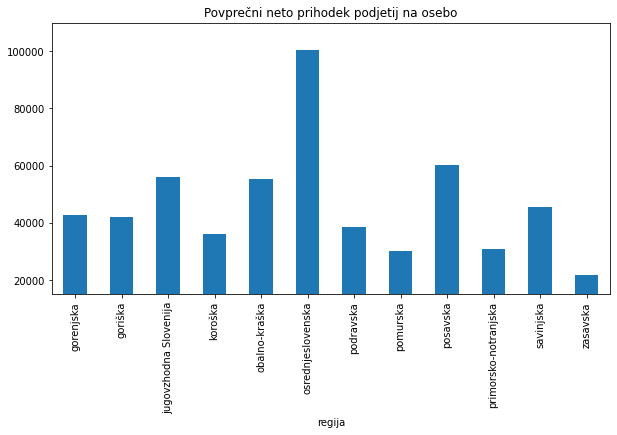

In [23]:
sum_podjetja = obcine.groupby('regija').sum()[['podjetja']].sort_values('regija')
each_podjetja = (sum_podjetja.podjetja / regije.prebivalci).round(decimals=2)
each_podjetja.plot.bar(ylim=(15000, 110000),figsize=(10,5), title='Povprečni neto prihodek podjetij na osebo')

Pri prihodku podjetij na regijski ravni visoko dominira osrednjeslovenska regija, kateri kasneje sledi posavska, jugovzhodna Slovenija ter obalno-kraška.

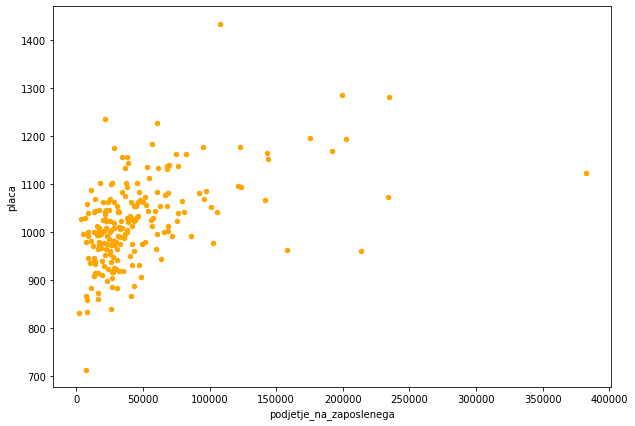

In [24]:
graf1 = obcine[['podjetje_na_zaposlenega', 'placa']].plot.scatter('podjetje_na_zaposlenega', 'placa', figsize=(10,7), color='orange')


In [25]:
obcine['placa'].corr(obcine['podjetje_na_zaposlenega'])

0.48663638942313014

Iz zgornjega je razvidno, da je v primeru višjih plač posameznikov tudi dobiček podjetij na posameznega delovno aktivnega prebivalca višji, kar vidimo v zgornjem kotu grafa.

#### **Lastnosti voznega parka**

Starost vozila v lasti je lahko še en dober pokazatelj oziroma način vpogleda v finančno stanje družbe.

Poglejmo, kako se le-ta giblje po državi.

<AxesSubplot:title={'center':'Povprečna starost osebnega avtomobila'}, ylabel='regija'>

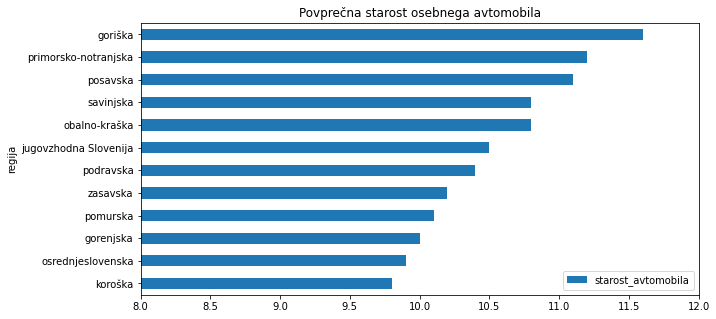

In [26]:
starosti = round(obcine.groupby('regija').mean()[['starost_avtomobila']], 1).sort_values('starost_avtomobila')
starosti.plot.barh(xlim=(8, 12), figsize=(10,5), title='Povprečna starost osebnega avtomobila')

V primerjavi z neto plačami posameznika je graf v grobem skladen - načeloma višja neto plača ustreza novejšemu jeklenemu konjičku, čeprav tudi tukaj naletimo na nekaj izjem.
V oči precej bode goriška, ki se znajde na skoraj nasprotnih polih, pa tudi pomurska in podravska.

#### **Analiza vpliva naključnih faktorjev**

Za konec si še na hitro poglejmo, kakšen je morebiten vpliv faktorjev, kot so delovna aktivnost, površina občine, starost avtomobila, prihodek na delovno aktivnega prebivalca od podjetij ter regija sama.

Za vpliv regije moramo najprej še podatke za regije, ki so v obliki "string" prevesti v berljivo obliko.

In [95]:
obcine.regija.drop_duplicates()
regions=obcine.regija.drop_duplicates().reset_index()
slovar=dict(zip(regions['regija'], regions['id']))
obcine['regija_id']=obcine['regija'].replace(slovar)

Uporabimo regresor.

<AxesSubplot:ylabel='Vpliv na višino plače'>

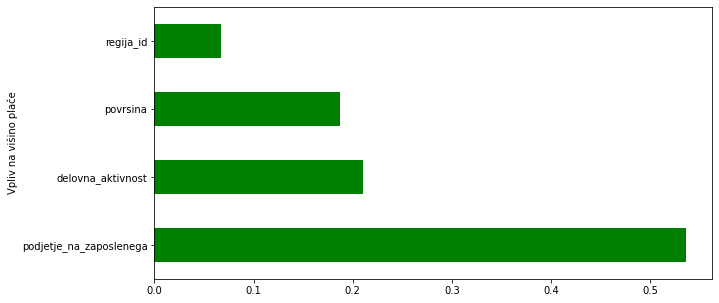

In [104]:
data_dep = obcine['placa']
data_indep = obcine[['povrsina', 'delovna_aktivnost', 'podjetje_na_zaposlenega', 'regija_id']]

regressor = RandomForestRegressor(n_estimators = 210, max_depth = 10, random_state=0)
rf = regressor.fit(data_indep, data_dep)

fig=plt.figure(figsize=(10, 5))
feat_importances = pd.Series(rf.feature_importances_, index=['povrsina', 'delovna_aktivnost', 'podjetje_na_zaposlenega', 'regija_id'])
feat_importances.sort_values(ascending=False).plot.barh(color = 'green', ylabel='Vpliv na višino plače')

Vidimo, da ima še največ vpliva na višino plače povprečni zaslužek podjetja na osebo v določeni občini, kar pa spet ni presenetljiv izid. Kot kaže, regija, v kateri se občina širše nahaja ni tako pomembna predispozicija.

### **Izsledki**

V tem sklopu bi želel samo na hitro preleteti svoje hipoteze.
Iz dobljenih podatkov in kratke analize smo torej ugotovili:
 * da splošne korelacije med povprečno neto plačo in delovno aktivnostjo ni, so pa skrajno podpovprečno delovno aktivne občine tudi podpovprečno plačane po osebi,
 * da so najnižji neto mesečni dohodki res v pomurski regiji, kateri pa sledi podravska. Pri tem velja opomniti, da znotraj posamezne regije prihaja do nekaterih večjih razlik zaradi večje oziroma manjše centraliziranosti.
 * da je centraliziranost precej odvisna od regije do regije, vendar pa predvsem po večini velja, da mestne občine oziroma "glavna mesta" regij ne igrajo najpomembnejše vloge na področju dobičkonosnosti podjetij,
 * da intuitivna skladnost starosti avtomobilov ni ravno pokazatelj dejanskega premoženja njihovih lastnikov oziroma njihovega dohodka, pač pa se starost odraža kot poslediva še mnogih drugih različnih faktorjev.

### **Zaključek**

V tej kratki analizi sem poskusil predvsem ugotoviti povezavo med nekaterimi vidiki ocene ekonomskega stanja v slovenskih občinah in statističnih regijah. Ob hipotetični ponovitvi tovrstne analize bi si vsekakor želel večjega nabora podatkov, saj bi pregled statističnih podatkov čez več let zagotovo dal še pristnejšo reprezentacijo, škodili pa ne bi tudi podrobnejši in bolj "surovi" podatki (v primerjavi z uporabljenimi, ki so že sami po sebi precej obdelani).
